In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

%matplotlib inline

Using TensorFlow backend.


In [2]:
features = ['Malignancy', 'Diameter', 'Lobulation', 'Spiculation']

In [3]:
%run 'CNNBlocks.ipynb'
%run 'modelArchitecture.ipynb'
%run 'batchGenerator.ipynb'

In [4]:
#Compiling model with branching on the level of Convolution block #5
model = compileModelDeepBranching((1,64,64,64),1e-3)

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(8, (3, 3, 3), padding="same", data_format="channels_first", kernel_regularizer=<keras.reg...)`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `AveragePooling3D` call to the Keras 2 API: `AveragePooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/opt/anaconda/lib/python3.5/site-packages/keras/legacy/layers.py:456: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras

Compiling model...


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, name="Spiculation", kernel_regularizer=<keras.reg..., activation="softplus")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:57: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


In [ ]:
# model.load_weights('/home/katya/LungCancer/Katya/CNN_v1/model_v1_weights_temp64.h5')

nbEpochs = 30

modelPath = '/home/katya/LungCancer/Katya/CNN_v2/model_and_weights/LUNA_model_v2.h5'
model, lossHist = trainModel(model, modelPath, batchSize=50, nbEpoch=nbEpochs, stepsPerEpoch=110, fp=True)

model.save_weights('/home/katya/LungCancer/Katya/CNN_v2/model_and_weights/LUNA_model_v2_weights.h5')

Loading positive patches
The number of samples for true category constitutes 3570
Loading negative patches
The number of samples for random category constitutes 5328
Loading false positive patches
The number of samples for false category constitutes 10656


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:63: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., validation_steps=20, steps_per_epoch=110, epochs=1, initial_epoch=0, callbacks=[<keras.ca...)`


Epoch 1/1
110/110 [==============================] - 536s - loss: 11.6553 - Malignancy_loss: 0.1303 - Diameter_loss: 0.1802 - Lobulation_loss: 0.1845 - Spiculation_loss: 0.2344 - val_loss: 11.1470 - val_Malignancy_loss: 0.1179 - val_Diameter_loss: 0.0924 - val_Lobulation_loss: 0.1337 - val_Spiculation_loss: 0.1152

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:63: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., validation_steps=20, steps_per_epoch=110, epochs=2, initial_epoch=1, callbacks=[<keras.ca...)`


110/110 [==============================] - 535s - loss: 10.7249 - Malignancy_loss: 0.0894 - Diameter_loss: 0.0512 - Lobulation_loss: 0.0591 - Spiculation_loss: 0.0650 - val_loss: 10.4964 - val_Malignancy_loss: 0.0946 - val_Diameter_loss: 0.0408 - val_Lobulation_loss: 0.0695 - val_Spiculation_loss: 0.0599

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:63: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., validation_steps=20, steps_per_epoch=110, epochs=3, initial_epoch=2, callbacks=[<keras.ca...)`


110/110 [==============================] - 536s - loss: 10.4472 - Malignancy_loss: 0.0882 - Diameter_loss: 0.0421 - Lobulation_loss: 0.0508 - Spiculation_loss: 0.0567 - val_loss: 10.4188 - val_Malignancy_loss: 0.0848 - val_Diameter_loss: 0.0363 - val_Lobulation_loss: 0.0556 - val_Spiculation_loss: 0.0552

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:63: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., validation_steps=20, steps_per_epoch=110, epochs=4, initial_epoch=3, callbacks=[<keras.ca...)`


 92/110 [========================>.....] - ETA: 80s - loss: 10.4024 - Malignancy_loss: 0.0881 - Diameter_loss: 0.0415 - Lobulation_loss: 0.0500 - Spiculation_loss: 0.0544 

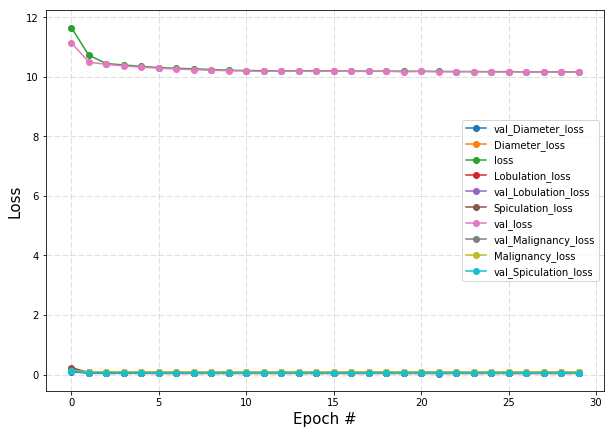

In [9]:
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Epoch #', fontsize=15)
plt.ylabel('Loss', fontsize=15)

labels=list(lossHist.keys())

for i,key in enumerate(lossHist):
    plt.plot([x for x in range(nbEpochs)], lossHist[key], 'o-', label=labels[i])
    plt.legend()
    
plt.savefig('/home/katya/LungCancer/Katya/CNN_v2/figures/' + str(version) + '.png')

In [ ]:
version = 8.5

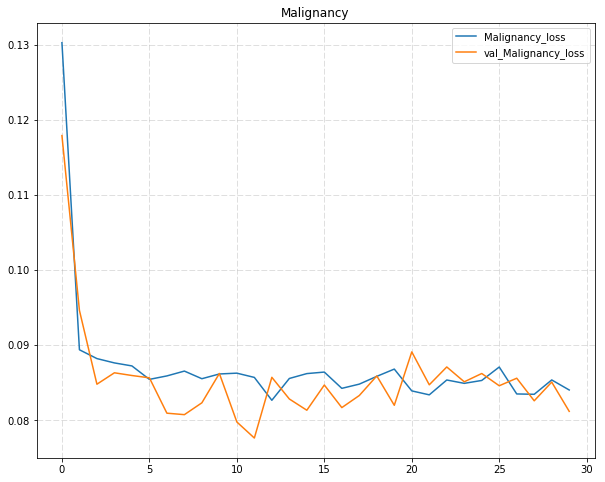

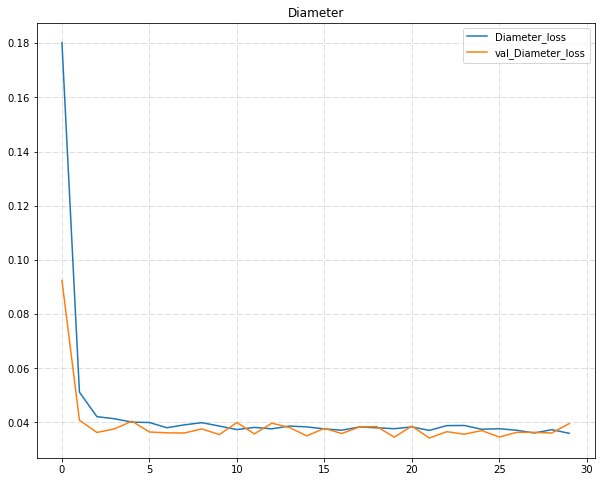

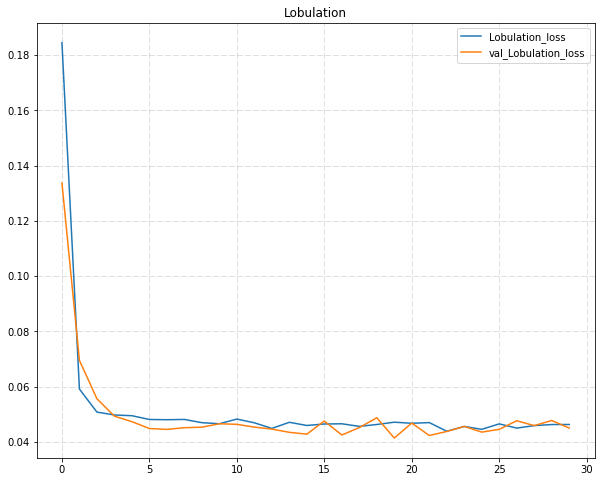

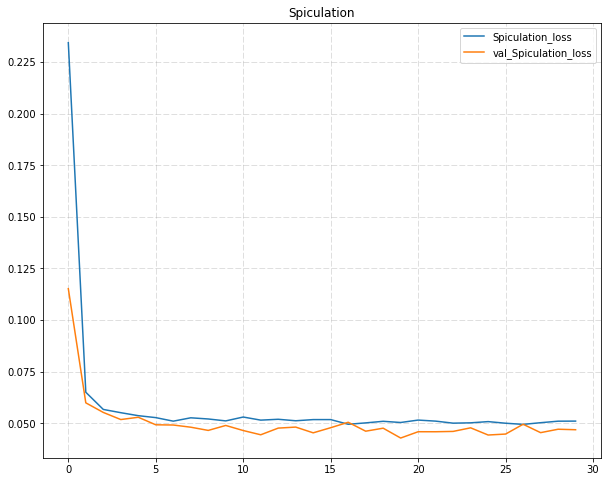

In [10]:
for feature in features:
    plt.figure(figsize=[10,8])
    plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')

    plt.plot([x for x in range(nbEpochs)], lossHist[feature+'_loss'], label=feature+'_loss')
    plt.plot([x for x in range(nbEpochs)], lossHist['val_'+feature+'_loss'], label='val_'+feature+'_loss')
    plt.title(feature)
    plt.legend()
    plt.savefig('/home/katya/LungCancer/Katya/CNN_v2/figures/'+str(version)+'.'+feature+'.png')